# Machine Learning Project : Predicting Loan Defaults for P2P lending

In [90]:
# Import Library Necessary for this Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from IPython.display import display # this will allow us to perform display() for Dataframe
from pylab import rcParams

# Better Display for Notebooks 
%matplotlib inline
plt.style.use('ggplot')

#Loading the Loan Dataset. This will end up being our Training Dataset
df_2012_2013 = pd.read_csv('2012-2013.csv',skiprows= 1, low_memory= False)
df_2014 = pd.read_csv('2014.csv', skiprows= 1, low_memory= False)
df_2015 = pd.read_csv('2015.csv', skiprows= 1, low_memory= False)
# Appending the two datasets together to prepare our traning dataset

data_train = pd.concat([df_2012_2013, df_2014, df_2015], axis= 0)
print data_train.shape[0]

844905



There are 7 loan statuses : Charged Off, Current, Default, Fully Paid, In Grace Period, Late (16-30 days), Late (31-120 days). We will consider Late (31 -120 days) , Default , Charged Off as a Default loan and Fully-Paid as a desirable loan and ignore everything else.

Statuses before : 
['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 'Default']


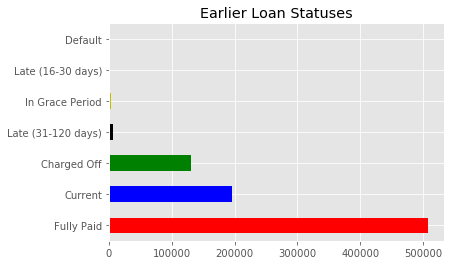

Statuses after : 
['Fully Paid', 'Default']


In [91]:
print "Statuses before : " 
print data_train['loan_status'].unique().tolist()
data_train['loan_status'].value_counts().plot(kind = 'barh', color = 'rbgkymc', title = 'Earlier Loan Statuses')
plt.show()
data_train = data_train.loc[(data_train['loan_status'].isin(['Fully Paid','Charged Off','Late (31-120 days)','Default']))]
data_train['loan_status'] = data_train['loan_status'].apply(lambda x: "Default" if
                                                            x in ['Late (31-120 days)','Charged Off','Default'] else x)

print "Statuses after : " 
print data_train['loan_status'].unique().tolist()

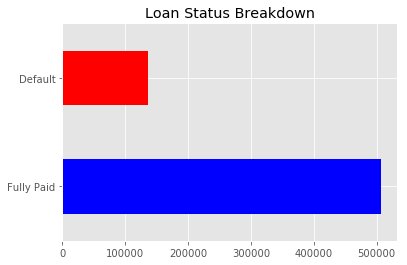

In [21]:
data_train['loan_status'].value_counts().plot(kind = 'barh', color = 'br', title = 'Loan Status Breakdown')
plt.show()

The Data Dictionary provided by the LendingClub does a great job in explaining what every feature means. After some research, I was able to filter our Independent Variables that would not add value to our model. We will being with removing columns with more than 50% missing values. 


In [23]:
data_len = len(data_train)/2 
loan_data = data_train.dropna(thresh= data_len, axis = 1)
loan_data.to_csv('Loan_data.csv', index = False)

In [25]:
loan_data = pd.read_csv('Loan_data.csv', low_memory= False)
loan_data.drop_duplicates()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,14000,14000,14000.0,36 months,12.85%,470.71,B,B4,Assistant Director - Human Resources,4 years,...,100.0,1,0,31840.0,17672.0,3900.0,27340.0,N,Cash,N
1,15000,15000,15000.0,36 months,14.47%,516.10,C,C2,building maint. mgr.,10+ years,...,7.7,0,0,33300.0,13038.0,20800.0,7500.0,N,Cash,N
2,15000,15000,15000.0,36 months,8.90%,476.30,A,A5,aircraft maintenance engineer,2 years,...,66.7,0,0,288195.0,39448.0,14200.0,33895.0,N,Cash,N
3,10000,10000,10000.0,36 months,9.67%,321.13,B,B1,Registered Nurse,7 years,...,66.7,0,0,58486.0,39143.0,9200.0,36186.0,N,Cash,N
4,20800,20800,20800.0,36 months,13.53%,706.16,B,B5,Operations Manager,10+ years,...,50.0,0,0,43100.0,23473.0,15000.0,0.0,N,Cash,N
5,27050,27050,27050.0,36 months,10.99%,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,...,25.0,0,0,138554.0,70186.0,35700.0,33054.0,N,Cash,N
6,9750,9750,9750.0,36 months,13.98%,333.14,C,C1,Medical Assistant,1 year,...,66.7,0,0,21314.0,14123.0,7200.0,6214.0,N,Cash,N
7,3000,3000,3000.0,36 months,12.85%,100.87,B,B4,Auditor,10+ years,...,66.7,2,0,32082.0,19530.0,4300.0,26782.0,N,Cash,N
8,12000,12000,12000.0,36 months,13.53%,407.40,B,B5,On road manager,10+ years,...,33.3,0,0,18130.0,13605.0,7000.0,10030.0,N,Cash,N
9,7550,7550,7550.0,36 months,16.24%,266.34,C,C5,Special Order Fulfillment Clerk,3 years,...,100.0,0,0,8000.0,5759.0,4000.0,0.0,N,Cash,N


As we can see we have a lot of columns to deal with in this dataset. We will now explore the data dictionary as this will be useful to clean the data. This part is crucial in order to understand the data and avoid error while fitting our machine learning model later on.

In [ ]:
# Let us see how many columns we have
print loan_data.shape[1]
loan_data_columns = loan_data.columns


87


We will see if we have description for all the 87 columns that we have. We will get rid of the columns for which we dont. 

In [23]:
data_dict = pd.read_excel('LCDataDictionary.xlsx')
data_dict_col = data_dict['LoanStatNew'].tolist()
print set(loan_data_columns) - set(data_dict_col)
difference = list(set(loan_data_columns).intersection(set(data_dict_col)))
loan_data  = loan_data[difference]
data_dict['Flag'] = data_dict.apply(lambda x: "Yes" if x['LoanStatNew'] in loan_data_columns else "No", axis = 1)
data_dict = data_dict[data_dict['Flag'] == "Yes"][['LoanStatNew','Description']]


set(['debt_settlement_flag', 'disbursement_method', 'hardship_flag', 'total_rev_hi_lim'])


# Getting Rid of features : 
### (this was probably the toughest/ longest step in the entire model building)
####Here we will get rid of funded_amnt_inv, emp_title, sub_grade (as it is already present in grade), zip_code (we already have the state), collection_recovery_fee, id, installment, last credit pull_dt, out_principal, total_payment, total_payment_inv, out_principal_inv, recoveries, total recoveries_prncp (because they all provide us with future imfomration, which we dont want), collection recovery fee etc.

In [27]:
discard_cols = ['funded_amnt','funded_amnt_inv','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
loan_data = loan_data.drop(discard_cols, axis =1)

ValueError: labels ['funded_amnt' 'funded_amnt_inv' 'sub_grade' 'emp_title' 'issue_d'
 'zip_code' 'out_prncp' 'out_prncp_inv' 'total_pymnt' 'total_pymnt_inv'
 'total_rec_prncp' 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt'] not contained in axis

In [52]:
len(loan_data.columns)


70

## We can see that we have 70 features now. Let us do some further Data Exploration to find out the breakdown of Loan Status' amongst various grades.

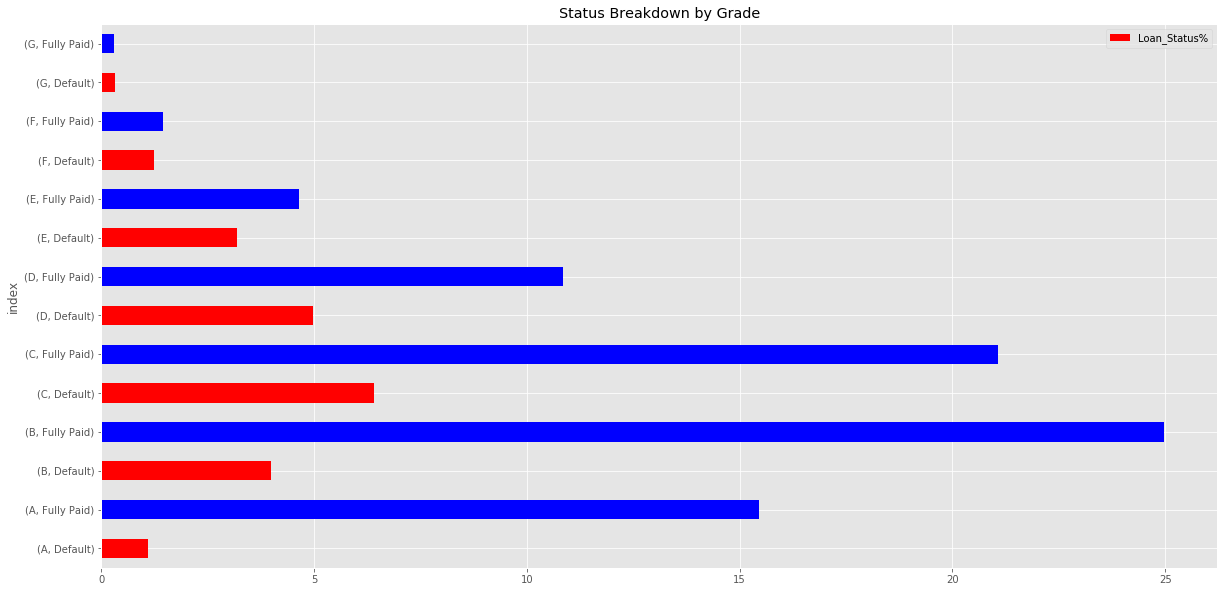

In [93]:
df_default = loan_data.groupby(['grade','loan_status']).agg({'loan_status' :'count'}).rename(columns = {'loan_status' : 'Loan Status Breakdown'})
df_default['Loan_Status%'] = (df_default['Loan Status Breakdown']/loan_data.shape[0]) * 100
df_default_sum = pd.DataFrame(df_default.sum(axis= 0)).T
df_default = df_default.append(df_default_sum).reset_index()
df_default.iloc[-1,0] = 'Total'
df_default
rcParams['figure.figsize'] = 20,10
df_default.iloc[:-1,].plot('index','Loan_Status%', kind = 'barh',color = 'rb', title = 'Status Breakdown by Grade')